In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Chargement des données

In [17]:
df = pd.read_csv("./input/cleaned.csv")
df

Unnamed: 0  SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  \
0                0      100002       1            0             0   
1                1      100003       0            1             0   
2                2      100004       0            0             1   
3                3      100006       0            1             0   
4                4      100007       0            0             0   
...            ...         ...     ...          ...           ...   
307502      307506      456251       0            0             0   
307503      307507      456252       0            1             0   
307504      307508      456253       0            1             0   
307505      307509      456254       1            1             0   
307506      307510      456255       0            1             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     0             0          202500.0    406597.5   
1                     1             0          270000.0   1293502.5   
2                     0             0           67500.0    135000.0   
3                     0             0          135000.0    312682.5   
4                     0             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307502                1             0          157500.0    254700.0   
307503                0             0           72000.0    269550.0   
307504                0             0          153000.0    677664.0   
307505                0             0          171000.0    370107.0   
307506                1             0          157500.0    675000.0   

        AMT_ANNUITY  ...  CC_NAME_CONTRACT_STATUS_Signed_MAX  \
0           24700.5  ...                                 NaN   
1           35698.5  ...                                 NaN   
2            6750.0  ...                                 NaN   
3           29686.5  ...                               False   
4           21865.5  ...                                 NaN   
...             ...  ...                                 ...   
307502      27558.0  ...                                 NaN   
307503      12001.5  ...                                 NaN   
307504      29979.0  ...                                 NaN   
307505      20205.0  ...                                 NaN   
307506      49117.5  ...                                 NaN   

        CC_NAME_CONTRACT_STATUS_Signed_MEAN  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       0.0   
4                                       NaN   
...                                     ...   
307502                                  NaN   
307503                                  NaN   
307504                                  NaN   
307505                                  NaN   
307506                                  NaN   

        CC_NAME_CONTRACT_STATUS_Signed_SUM  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      0.0   
4                                      NaN   
...                                    ...   
307502                                 NaN   
307503                                 NaN   
307504                                 NaN   
307505                                 NaN   
307506                                 NaN   

        CC_NAME_CONTRACT_STATUS_Signed_VAR  CC_NAME_CONTRACT_STATUS_nan_MIN  \
0                                      NaN                              NaN   
1                                      NaN                              NaN   
2                                      NaN                              NaN   
3                                      0.0                            False   
4                                      NaN  

# Sampling pour limiter les temps de traitement

In [18]:
df = df.sample(n=16000, random_state=42)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 232923 to 120801
Columns: 798 entries, Unnamed: 0 to CC_COUNT
dtypes: bool(133), float64(605), int64(44), object(16)
memory usage: 83.3+ MB


In [20]:
df.isna().sum()

Unnamed: 0                              0
SK_ID_CURR                              0
TARGET                                  0
CODE_GENDER                             0
FLAG_OWN_CAR                            0
                                    ...  
CC_NAME_CONTRACT_STATUS_nan_MAX     11493
CC_NAME_CONTRACT_STATUS_nan_MEAN    11493
CC_NAME_CONTRACT_STATUS_nan_SUM     11493
CC_NAME_CONTRACT_STATUS_nan_VAR     11526
CC_COUNT                            11493
Length: 798, dtype: int64

In [21]:
df.columns[df.isnull().any()]

Index(['AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=610)

# Représentation de la répartition de la target

<Axes: xlabel='TARGET', ylabel='Count'>

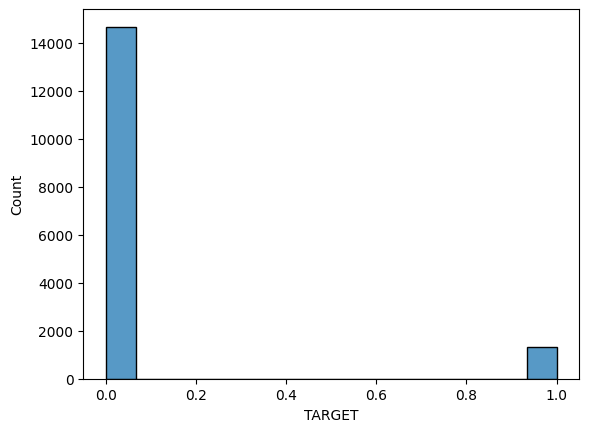

In [22]:
sns.histplot(df['TARGET'])

In [23]:
X = df.copy()
X.drop(columns='TARGET', inplace=True)
y = df['TARGET']
X.drop(columns = ['Unnamed: 0', 'SK_ID_CURR'], inplace=True)
X

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
232923            1             0                0             2   
263698            1             0                1             0   
36463             0             0                1             0   
279380            0             1                0             0   
148324            1             0                0             0   
...             ...           ...              ...           ...   
184039            1             0                1             0   
57976             1             1                0             1   
208741            1             0                1             0   
213022            1             0                0             0   
120801            0             0                0             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
232923           72000.0    198666.0      15696.0         175500.0   
263698          221400.0    247500.0       9814.5         247500.0   
36463           360000.0    521136.0      54855.0         495000.0   
279380          360000.0    824917.5      39816.0         724500.0   
148324          135000.0    628114.5      22689.0         477000.0   
...                  ...         ...          ...              ...   
184039           90000.0    270000.0      18783.0         270000.0   
57976            81000.0    904500.0      26577.0         904500.0   
208741           67500.0    241618.5      23895.0         229500.0   
213022          247500.0    582804.0      31747.5         463500.0   
120801           99900.0    254700.0      24192.0         225000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
232923                    0.025164       -9267  ...   
263698                    0.015221      -10916  ...   
36463                     0.046220      -10066  ...   
279380                    0.046220      -18698  ...   
148324                    0.018801      -18162  ...   
...                            ...         ...  ...   
184039                    0.026392       -9182  ...   
57976                     0.025164      -15001  ...   
208741                    0.024610      -17731  ...   
213022                    0.006629      -21967  ...   
120801                    0.006008      -21002  ...   

        CC_NAME_CONTRACT_STATUS_Signed_MAX  \
232923                                 NaN   
263698                                 NaN   
36463                                  NaN   
279380                                 NaN   
148324                                 NaN   
...                                    ...   
184039                                 NaN   
57976                                  NaN   
208741                                 NaN   
213022                                 NaN   
120801                                 NaN   

        CC_NAME_CONTRACT_STATUS_Signed_MEAN  \
232923                                  NaN   
263698                                  NaN   
36463                                   NaN   
279380                                  NaN   
148324                                  NaN   
...                                     ...   
184039                                  NaN   
57976                                   NaN   
208741                                  NaN   
213022                                  NaN   
120801                                  NaN   

        CC_NAME_CONTRACT_STATUS_Signed_SUM  \
232923                                 NaN   
263698                                 NaN   
36463                                  NaN   
279380                                 NaN   
148324                                 NaN   
...                                    ...   
184039                                 NaN   
57976                                  NaN   
208741                                 NaN   
213022                                 NaN   
120801                                 NaN   

        CC_NAME_CO

# Split en train et test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputation

In [25]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [110]:
X_train.fillna(-1, inplace=True)
X_test.fillna(-1, inplace=True)

In [28]:
X_test.to_csv('./datas/test_feature_engineering.csv')

# Standardisation

In [111]:
scaler = std_scale = preprocessing.StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)
X_train_knn

array([[-1.40836227,  1.38690975, -0.6760217 , ...,  1.60463341,
         1.61285033,  3.57885333],
       [ 0.71004458, -0.72102745, -0.6760217 , ..., -0.6231953 ,
        -0.62002034, -0.42984674],
       [ 0.71004458, -0.72102745, -0.6760217 , ..., -0.6231953 ,
        -0.62002034, -0.42984674],
       ...,
       [ 0.71004458, -0.72102745, -0.6760217 , ..., -0.6231953 ,
        -0.62002034, -0.42984674],
       [ 0.71004458, -0.72102745, -0.6760217 , ..., -0.6231953 ,
        -0.62002034, -0.42984674],
       [ 0.71004458, -0.72102745,  1.47924246, ..., -0.6231953 ,
        -0.62002034, -0.42984674]])

# Functions

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

In [113]:
# Function to display confusion matrix
def display_confusion_matrix(y_test, y_pred, model_name="Model"):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(model_name + ": Confusion matrix")
    plt.grid(visible=None)
    plt.show()

In [114]:
# Function to compute roc curve
def compute_roc_curve(y_test, y_pred_proba, model_name="Model", disp_best_th=False):
    # Compute metrics
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Create fig
    plt.figure()
    plt.title(model_name + ": ROC curve")

    # Display x=y
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')

    # Display ROC curve
    sns.lineplot(x=fpr, y=tpr, legend='brief', label="AUC = {:.3f}".format((auc)))

    if disp_best_th is True:
        # Compute best threshold
        o_tpr = tpr[np.argmin(np.abs(fpr+tpr-1))]
        o_fpr = fpr[np.argmin(np.abs(fpr+tpr-1))]
        o_threshold = thresholds[np.argmin(np.abs(fpr+tpr-1))]

        # Display best threshold
        sns.scatterplot(x=[o_fpr], y=[o_tpr], legend='brief', label="Best threshold = {:.3f}".format(o_threshold))

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

    # Return AUC score
    return auc

### Fonction métier

In [115]:
def cout_custom(y_test, y_pred):  
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cost = (10*fn + fp) / len(y_test)
    return float(cost)

In [116]:
# Create business score
business_score = make_scorer(cout_custom, greater_is_better=False)

In [117]:
# Function to compute predictions and metrics
def compute_classification_results(model, model_name, x_test, y_test):

    # Predict probability of class 1 (repay failure)
    y_pred_proba = model.predict_proba(x_test)[:,1]

    # Predict values 
    y_pred = model.predict(x_test)

    # Display confusion matrix
    display_confusion_matrix(y_test, y_pred, model_name=model_name)

    # Draw roc curve
    auc_score = compute_roc_curve(y_test, y_pred_proba, model_name=model_name)

    # Compute scores
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    display(clf_report)

    # Display business loss func
    score_business = cout_custom(y_test, y_pred)
    print("Business score =", score_business)

    return score_business, auc_score, clf_report

# MlFlow

In [118]:
import mlflow
from mlflow import log_metric, log_param, log_artifacts

# Create experiment
experiment_name = 'credit_scoring'
mlflow.set_experiment(experiment_name)
mlflow.end_run()

In [119]:
# Function to log model to mlflow
def log_mlflow(model, name, custom_score, n_estimator=None, max_depth=None, auc_score=None, f1_score=None, acc_score=None,
               train_class_0=None, train_class_1=None):

    # Track params and metrics 
    with mlflow.start_run():
        # Set run name
        mlflow.set_tag("mlflow.runName", name)

        # Set parameters
        mlflow.log_param("n_estimators", n_estimator)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("train_class_0", train_class_0)
        mlflow.log_param("train_class_1", train_class_1)

        # Set metrics
        mlflow.log_metric("Custom score", custom_score)
        mlflow.log_metric("AUC", auc_score)
        mlflow.log_metric("F1", f1_score)
        mlflow.log_metric("Accuracy", acc_score)

        # Save model to artifacts
        mlflow.sklearn.log_model(sk_model=model, artifact_path=name, registered_model_name=name)

    mlflow.end_run()

# Test de différents algos

## DummyClassifier

In [120]:
from sklearn.dummy import DummyClassifier

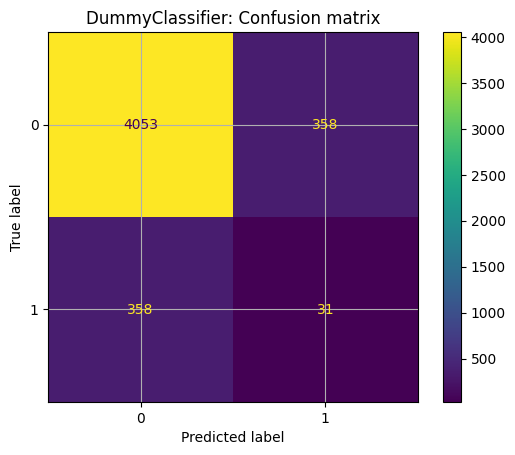

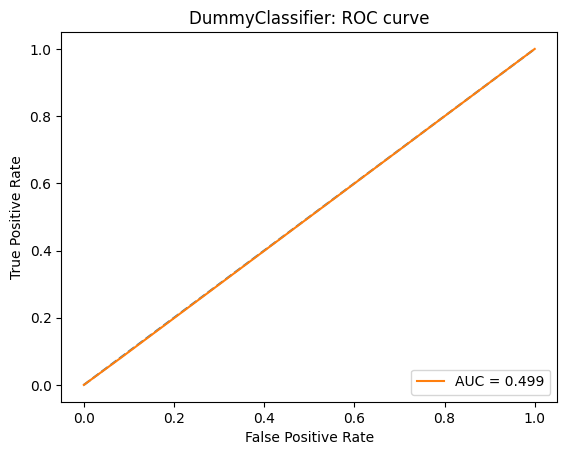

precision    recall  f1-score      support
0              0.918839  0.918839  0.918839  4411.000000
1              0.079692  0.079692  0.079692   389.000000
accuracy       0.850833  0.850833  0.850833     0.850833
macro avg      0.499265  0.499265  0.499265  4800.000000
weighted avg   0.850833  0.850833  0.850833  4800.000000

Business score = 0.8204166666666667


Registered model 'DummyClassifier' already exists. Creating a new version of this model...
2023/06/13 22:24:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: DummyClassifier, version 8
Created version '8' of model 'DummyClassifier'.


In [121]:
# Create logistic regression model
dc = DummyClassifier(strategy='stratified', random_state=42)
dc_name = 'DummyClassifier'

# Fit model
dc.fit(X_train_knn, y_train)

# Compute results
dc_business_score, dc_auc, dc_report = compute_classification_results(dc, dc_name, X_test_knn, y_test)

# Save logs
log_mlflow(dc, dc_name, auc_score=dc_auc, custom_score=dc_business_score,
           f1_score=dc_report.loc['weighted avg', 'f1-score'], 
           acc_score=dc_report.loc['accuracy', 'precision'],
           train_class_0=Counter(y_train)[0], train_class_1=Counter(y_train)[1])

## LogisticRegression

In [122]:
from sklearn.linear_model import LogisticRegression

c:\Users\dar55\.virtualenvs\Data_Scientist-FqGbSdFt\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


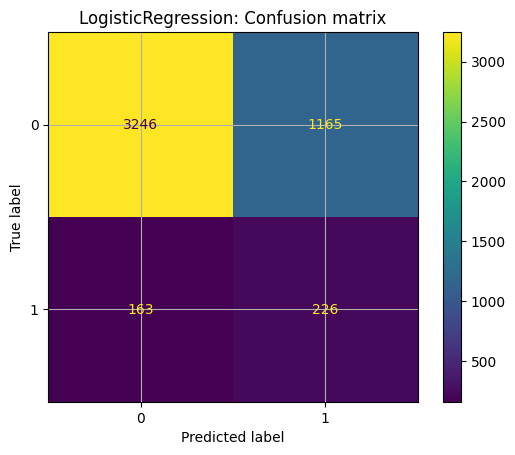

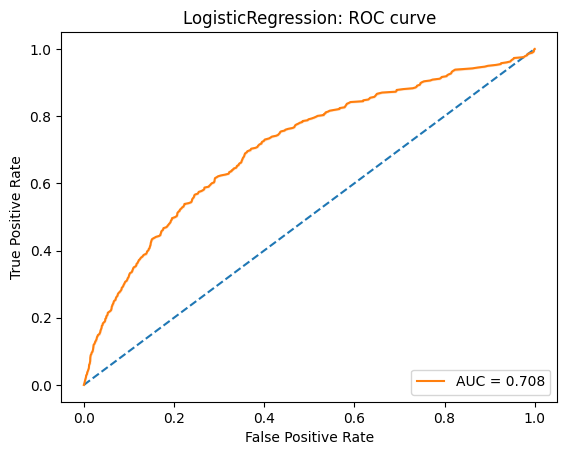

precision    recall  f1-score      support
0              0.952185  0.735888  0.830179  4411.000000
1              0.162473  0.580977  0.253933   389.000000
accuracy       0.723333  0.723333  0.723333     0.723333
macro avg      0.557329  0.658432  0.542056  4800.000000
weighted avg   0.888186  0.723333  0.783479  4800.000000

Business score = 0.5822916666666667


Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2023/06/13 22:24:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 5


CPU times: total: 3.98 s
Wall time: 9.57 s


Created version '5' of model 'LogisticRegression'.


In [123]:
%%time

# Create logistic regression model
lr = LogisticRegression(class_weight='balanced')
lr_name = 'LogisticRegression'

# Train model
lr.fit(X_train_knn, y_train)

# Compute results
lr_business_score, lr_auc, lr_report = compute_classification_results(lr, lr_name, X_test_knn, y_test)

# Save logs
log_mlflow(lr, lr_name, auc_score=lr_auc, custom_score=lr_business_score,
           f1_score=lr_report.loc['weighted avg', 'f1-score'], 
           acc_score=lr_report.loc['accuracy', 'precision'],
           train_class_0=Counter(y_train)[0], train_class_1=Counter(y_train)[1])

## RandomForest

In [124]:
from sklearn.ensemble import RandomForestClassifier

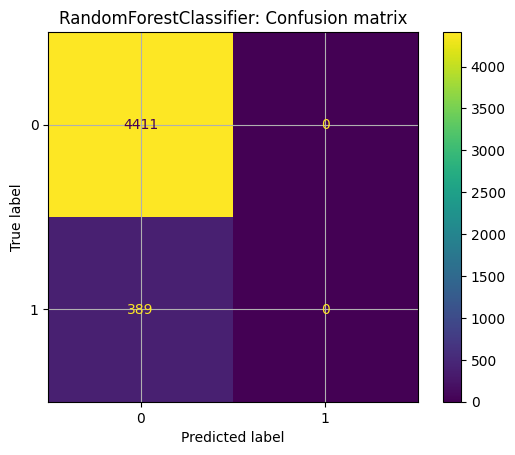

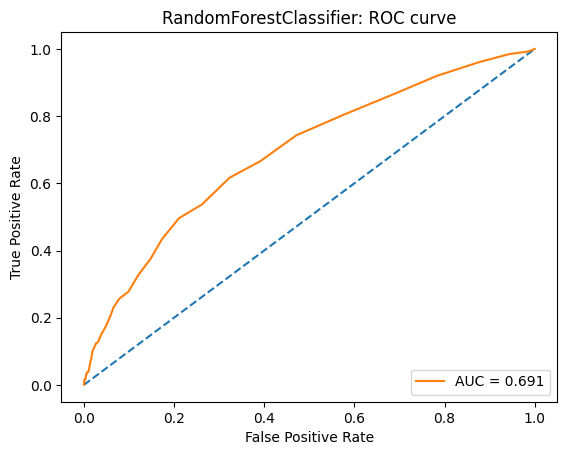

c:\Users\dar55\.virtualenvs\Data_Scientist-FqGbSdFt\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dar55\.virtualenvs\Data_Scientist-FqGbSdFt\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dar55\.virtualenvs\Data_Scientist-FqGbSdFt\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

precision    recall  f1-score      support
0              0.918958  1.000000  0.957768  4411.000000
1              0.000000  0.000000  0.000000   389.000000
accuracy       0.918958  0.918958  0.918958     0.918958
macro avg      0.459479  0.500000  0.478884  4800.000000
weighted avg   0.844484  0.918958  0.880149  4800.000000

Business score = 0.8104166666666667


Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2023/06/13 22:24:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 6


CPU times: total: 9.02 s
Wall time: 5.51 s


Created version '6' of model 'RandomForestClassifier'.


In [125]:
%%time

# Create random forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_name = 'RandomForestClassifier'

# Train model
rf.fit(X_train_knn, y_train)

# Compute results
rf_business_score, rf_auc, rf_report = compute_classification_results(rf, rf_name, X_test_knn, y_test)

# Save logs
rf_params = rf.get_params()
log_mlflow(rf, rf_name,
           custom_score=rf_business_score,
           auc_score=rf_auc,
           f1_score=rf_report.loc['weighted avg', 'f1-score'], 
           acc_score=rf_report.loc['accuracy', 'precision'],
           n_estimator=rf_params['n_estimators'],
           max_depth=rf_params['max_depth'], 
           train_class_0=Counter(y_train)[0],
           train_class_1=Counter(y_train)[1])

## DecisionTree

In [126]:
from sklearn.tree import DecisionTreeClassifier

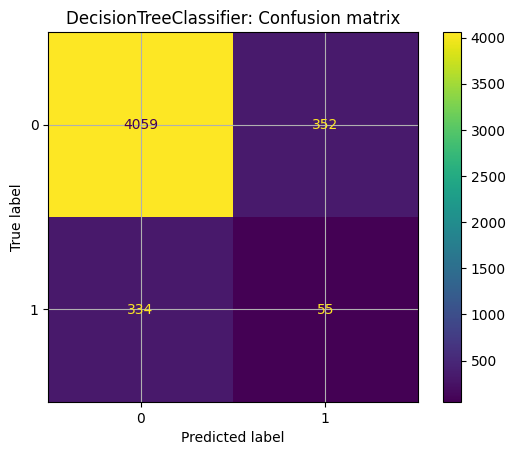

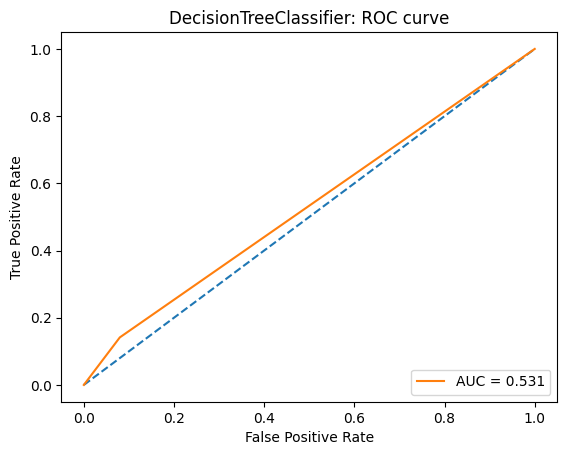

precision    recall  f1-score      support
0              0.923970  0.920200  0.922081  4411.000000
1              0.135135  0.141388  0.138191   389.000000
accuracy       0.857083  0.857083  0.857083     0.857083
macro avg      0.529553  0.530794  0.530136  4800.000000
weighted avg   0.860041  0.857083  0.858553  4800.000000

Business score = 0.7691666666666667


Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
2023/06/13 22:24:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeClassifier, version 4


CPU times: total: 1.56 s
Wall time: 8.14 s


Created version '4' of model 'DecisionTreeClassifier'.


In [127]:
%%time

# Create random forest classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_name = 'DecisionTreeClassifier'

# Train model
dt.fit(X_train_knn, y_train)

# Compute results
dt_business_score, dt_auc, dt_report = compute_classification_results(dt, dt_name, X_test_knn, y_test)

# Save logs
dt_params = dt.get_params()
log_mlflow(dt, dt_name,
           custom_score=dt_business_score,
           auc_score=dt_auc,
           f1_score=dt_report.loc['weighted avg', 'f1-score'], 
           acc_score=dt_report.loc['accuracy', 'precision'],
           max_depth=dt_params['max_depth'], 
           train_class_0=Counter(y_train)[0],
           train_class_1=Counter(y_train)[1])

## HistGradientBoosting

In [128]:
from sklearn.ensemble import HistGradientBoostingClassifier

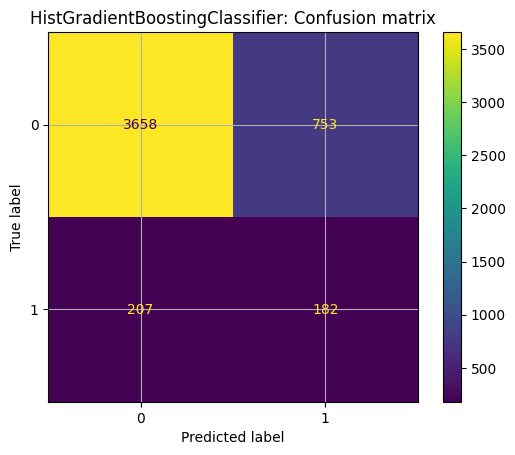

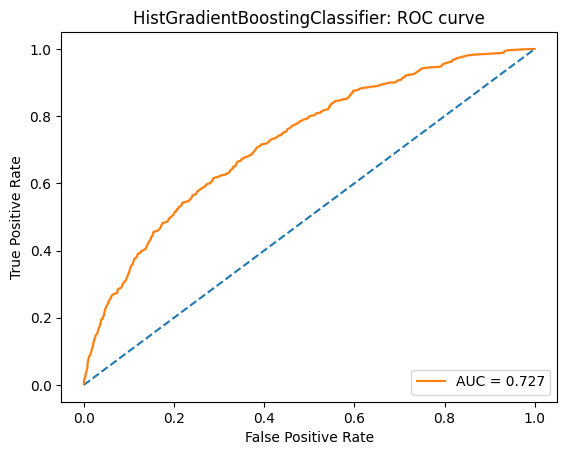

precision    recall  f1-score  support
0              0.946442  0.829290  0.884002   4411.0
1              0.194652  0.467866  0.274924    389.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.570547  0.648578  0.579463   4800.0
weighted avg   0.885516  0.800000  0.834641   4800.0

Business score = 0.588125


Registered model 'HistGradientBoostingClassifier' already exists. Creating a new version of this model...
2023/06/13 22:25:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: HistGradientBoostingClassifier, version 5


CPU times: total: 11.7 s
Wall time: 12.6 s


Created version '5' of model 'HistGradientBoostingClassifier'.


In [129]:
%%time

# Create XGBoost classifier
hgbc = HistGradientBoostingClassifier(class_weight='balanced', random_state=42)
hgbc_name = 'HistGradientBoostingClassifier'

# Train model
hgbc.fit(X_train_knn, y_train)

# Compute results
hgbc_business_score, hgbc_auc, hgbc_report = compute_classification_results(hgbc, hgbc_name, X_test_knn, y_test)

# Save logs
hgbc_params = hgbc.get_params()
log_mlflow(hgbc, hgbc_name,
           custom_score=hgbc_business_score,
           auc_score=hgbc_auc,
           f1_score=hgbc_report.loc['weighted avg', 'f1-score'], 
           acc_score=hgbc_report.loc['accuracy', 'precision'],
           max_depth=hgbc_params['max_depth'], 
           train_class_0=Counter(y_train)[0],
           train_class_1=Counter(y_train)[1])

# Hyperparametrisation

In [184]:
param_grid = {'max_leaf_nodes': np.arange(2, 6, 1), 'min_samples_leaf': np.arange(1, 10, 1)}

mes = {"AUC": "roc_auc", "Acc": "accuracy", "Precision": "precision", "Bancaire" : business_score}

hgbc = model_selection.GridSearchCV(
    HistGradientBoostingClassifier(class_weight='balanced', random_state=42), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,
    n_jobs=-1,           # nombre de folds de validation croisée
    scoring=mes,
    refit='Bancaire',
    return_train_score=True,
)

# Optimiser ce classifieur sur le jeu d'entraînement
hgbc.fit(X_train_knn, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(hgbc.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, prec, banc, params in zip(
        hgbc.cv_results_['mean_test_AUC'], # score moyen
        hgbc.cv_results_['mean_test_Acc'],  # écart-type du score
        hgbc.cv_results_['mean_test_Precision'],
        hgbc.cv_results_['mean_test_Bancaire'],
        hgbc.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("AUC = {:.3f}, acc = {:.03f}, prec = {:.03f}, banc = {:.01f} for {}".format(
        mean,
        std,
        prec,
        banc,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_leaf_nodes': 3, 'min_samples_leaf': 3}
Résultats de la validation croisée :
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 1}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 2}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 3}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 4}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 5}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 6}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 7}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 for {'max_leaf_nodes': 2, 'min_samples_leaf': 8}
AUC = 0.749, acc = 0.704, prec = 0.174, banc = -0.5 f

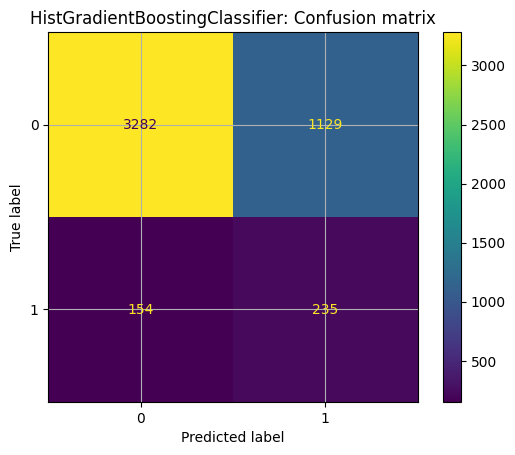

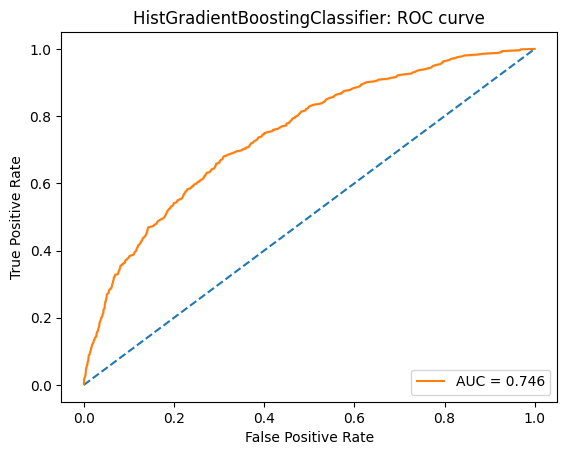

precision    recall  f1-score      support
0              0.955180  0.744049  0.836498  4411.000000
1              0.172287  0.604113  0.268112   389.000000
accuracy       0.732708  0.732708  0.732708     0.732708
macro avg      0.563734  0.674081  0.552305  4800.000000
weighted avg   0.891733  0.732708  0.790435  4800.000000

Business score = 0.5560416666666667
CPU times: total: 7.36 s
Wall time: 9.53 s


In [32]:
%%time

# Create random forest classifier
hgbc2 = HistGradientBoostingClassifier(max_leaf_nodes=3, min_samples_leaf=3, class_weight='balanced', random_state=42)
hgbc2_name = 'HistGradientBoostingClassifier'

# Train model
hgbc2.fit(X_train_knn, y_train)

# Compute results
hgbc2_business_score, hgbc2_auc, hgbc2_report = compute_classification_results(hgbc2, hgbc2_name, X_test_knn, y_test)

# Save logs
hgbc2_params = hgbc2.get_params()
log_mlflow(hgbc2, hgbc2_name,
           custom_score=hgbc2_business_score,
           auc_score=hgbc2_auc,
           f1_score=hgbc2_report.loc['weighted avg', 'f1-score'], 
           acc_score=hgbc2_report.loc['accuracy', 'precision'],
           max_depth=hgbc2_params['max_depth'], 
           train_class_0=Counter(y_train)[0],
           train_class_1=Counter(y_train)[1])

# Détermination du seuil réduisant le cout métier

In [190]:
hgbct = HistGradientBoostingClassifier(max_leaf_nodes=3, min_samples_leaf=3, class_weight='balanced', random_state=42)
hgbct.fit(X_train_knn, y_train)
predict_proba_rft = hgbct.predict_proba(X_test_knn)
probs = predict_proba_rft[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print("Meilleur threshold = %f" % (best_thresh))

Meilleur threshold = 0.466912


In [191]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

In [195]:
thresholds = np.arange(0, 1, 0.0001)
scores = [cout_custom(y_test, to_labels(probs, t)) for t in thresholds]
ix = np.argmin(scores)
print('Threshold=%.4f, Score métier=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.4669, Score métier=0.54312


# SHAP

In [197]:
import shap

In [210]:
features_names = X.columns.to_list()
explainer = shap.TreeExplainer(hgbct, feature_names=features_names)
shap_values = explainer(X_test_knn)

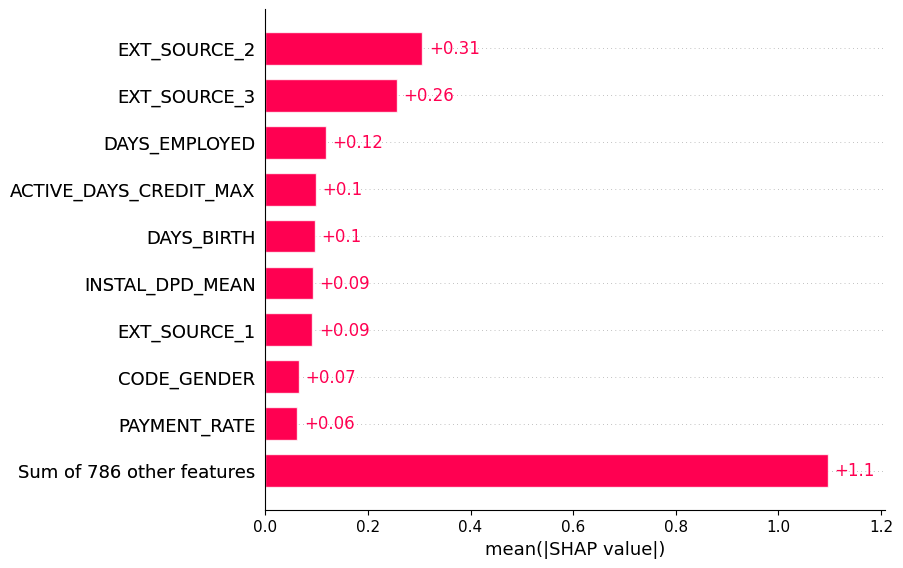

In [211]:
shap.plots.bar(shap_values)

# Data Drift

In [213]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

In [214]:
data_ref = pd.read_csv("./input/application_train.csv")
data_test = pd.read_csv("./input/application_test.csv")

In [215]:
data_drift_report = Report(metrics=[
    DataDriftPreset(),
])
data_drift_report.run(reference_data=data_ref.drop(columns='TARGET'),
                      current_data=data_test, column_mapping=None)
data_drift_report

In [216]:
data_drift_report.save_html('./data_drift_report.html')